# **Compressing Data via Dimensionality Reduction**

Data compression is an important topic in machine learning, and it helps us to store and
analyze the increasing amounts of data that are produced and collected in the modern age of technology.

In this chapter, we will cover the following topics:
- Principal component analysis(PCA) for unsupervised data compression
- Linear discriminant analysis(LDA) as a supervised dimensionality reduction technique for maxi-
mizing class separability
- A brief overview of nonlinear dimensionality reduction techniques and t-distributed stochastic
neighbor embedding for data visualization

**Unsupervised dimensionality reduction via principal component analysis**

Similar to feature selection, we can use different feature extraction techniques to reduce the number
of features in a dataset. The difference between feature selection and feature extraction is that while
we maintain the original features when we use feature selection algorithms, such as sequential back-
ward selection, we use feature extraction to transform or project the data onto a new feature space.
In the context of dimensionality reduction, feature extraction can be understood as an approach to
data compression with the goal of maintaining most of the relevant information. In practice, feature
extraction is not only used to improve storage space or the computational efficiency of the learning
algorithm but can also improve the predictive performance by reducing the curse of dimensionali-
ty—especially if we are working with non-regularized models.

**The main steps in principal component analysis**

n this section, we will discuss principal component analysis (PCA), an unsupervised linear transfor-
mation technique that is widely used across different fields, most prominently for
- feature extraction and dimensionality reduction.
Other popular applications of PCA include
- exploratory data analysis and the denoising of signals in stock market trading, and
- the analysis of genome data and gene expression levels in the field of bioinformatics.

![image.png](attachment:image.png)

In Figure 5.1, x<sub>1</sub> and x<sub>2</sub> are the original feature axes, and **PC1** and **PC2** are the principal components

**Note** that the PCA directions are highly sensitive to data scaling, and we need to standardize the features prior to PCA if
the features were measured on different scales and we want to assign equal importance to all features.

Before looking at the PCA algorithm for dimensionality reduction in more detail, let’s summarize the
approach in a few simple steps:
 1. Standardize the d-dimensional dataset.
 2. Construct the covariance matrix.
 3. Decompose the covariance matrix into its eigenvectors and eigenvalues.
 4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
 5. Select k eigenvectors, which correspond to the k largest eigenvalues, where k is the dimension-
ality of the new feature subspace (𝑘𝑘 𝑘 𝑘𝑘 ).
 6. Construct a projection matrix, W, from the “top” k eigenvectors.
 7. Transform the d-dimensional input dataset, X, using the projection matrix, W, to obtain the
new k-dimensional feature subspace.

**Extracting the principal components step by step**

In this subsection, we will tackle the first four steps of a PCA:

 1. Standardizing the data
 2. Constructing the covariance matrix
 3. Obtaining the eigenvalues and eigenvectors of the covariance matrix
 4. Sorting the eigenvalues by decreasing order to rank the eigenvectors


First, we will start by loading the Wine dataset that we worked with in Chapter 4, Building Good Training
Datasets – Data Preprocessing

In [ ]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Next, we will process the Wine data into separate training and test datasets—using 70 percent and 30
percent of the data, respectively—and standardize it to unit variance:

In [ ]:
# Splitting the data into 70% training and 30% test subsets.
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,
                     stratify=y,
                     random_state=0)

In [ ]:
# Standardizing the data.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n', eigen_vals)


Eigenvalues 
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [ ]:
#print('\nEigenvectors \n', eigen_vecs)

**Total and explained variance**

In [ ]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

Using the NumPy cumsum function, we can then calculate the cumulative sum of explained variances,
which we will then plot via Matplotlib’s step function:

Matplotlib is building the font cache; this may take a moment.


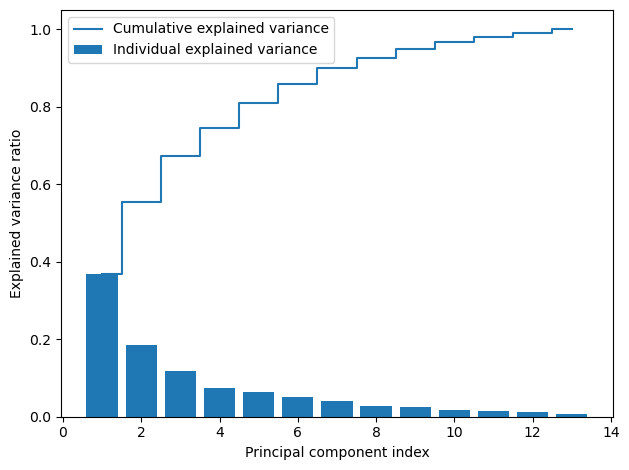

In [ ]:
import matplotlib.pyplot as plt


plt.bar(range(1, 14), var_exp, align='center',
        label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('figures/05_02.png', dpi=300)
plt.show()

## **Feature transformation**

Now that we have successfully decomposed the covariance matrix into eigenpairs, let’s proceed with
the last three steps to transform the Wine dataset onto the new principal component axes. The re-
maining steps we are going to tackle in this section are the following:

 1. Select k eigenvectors, which correspond to the k largest eigenvalues, where k is the dimension-
ality of the new feature subspace (𝑘𝑘 𝑘 𝑘𝑘 ).
 2. Construct a projection matrix, W, from the “top” k eigenvectors.
 3. Transform the d-dimensional input dataset, X, using the projection matrix, W, to obtain the
new k-dimensional feature subspace.

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [ ]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218 -0.50303478]
 [ 0.24724326 -0.16487119]
 [-0.02545159 -0.24456476]
 [ 0.20694508  0.11352904]
 [-0.15436582 -0.28974518]
 [-0.39376952 -0.05080104]
 [-0.41735106  0.02287338]
 [ 0.30572896 -0.09048885]
 [-0.30668347 -0.00835233]
 [ 0.07554066 -0.54977581]
 [-0.32613263  0.20716433]
 [-0.36861022  0.24902536]
 [-0.29669651 -0.38022942]]


In [ ]:
X_train_std[0].dot(w)

array([ 2.38299011, -0.45458499])

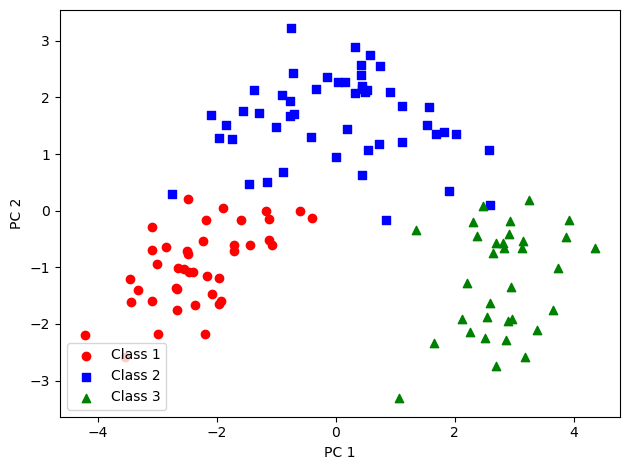

In [ ]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c=c, label=f'Class {l}', marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_03.png', dpi=300)
plt.show()

## **Principal component analysis in scikit-learn**

Plot decision regions functions:

In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=f'Class {cl}',
            edgecolor='black')

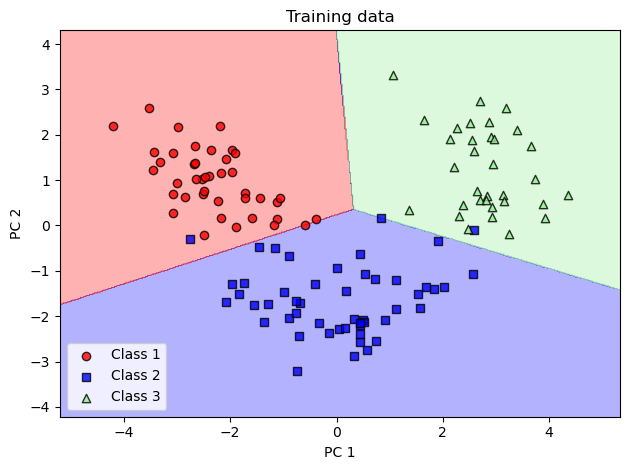

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
# initializing the PCA transformer and
# logistic regression estimator:
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr',random_state=1,solver='lbfgs')
# dimensionality reduction:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# fitting the logistic regression model on the reduced dataset:
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.title("Training data")
plt.tight_layout()
plt.show()

Figure 5.4: Training examples and logistic regression decision regions after using scikit-learn’s PCA
for dimensionality reduction

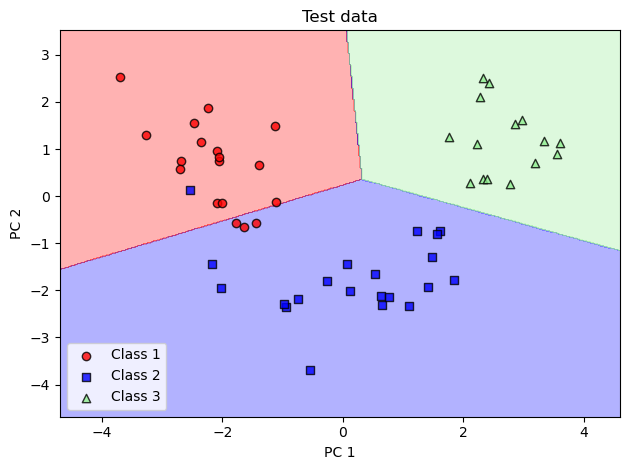

In [ ]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.title("Test data")
plt.tight_layout()
plt.show()

Figure 5.5: Test datapoints with logistic regression decision regions in the PCA-based feature space

If we are interested in the explained variance ratios of the different principal components, we can
simply initialize the PCA class with the n_components parameter set to None, so all principal components
are kept and the explained variance ratio can then be accessed via the explained_variance_ratio_
attribute:

In [ ]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

## **Assessing feature contributions**

As we learned, via PCA, we create principal components that represent
linear combinations of the features. Sometimes, we are interested to know about how much each orig-
inal feature contributes to a given principal component. These contributions are often called **loadings.**

First, we compute the 13×13-dimensional loadings matrix by multiplying the eigenvectors by the
square root of the eigenvalues:

In [ ]:
loadings = eigen_vecs * np.sqrt(eigen_vals)

Then, we plot the loadings for the first principal component, loadings[:, 0], which is the first col-
umn in this matrix:

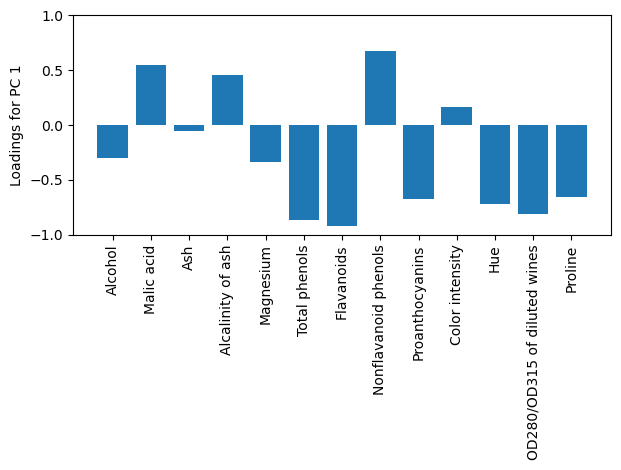

In [ ]:
fig, ax = plt.subplots()

ax.bar(range(13), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
#plt.savefig('figures/05_05_02.png', dpi=300)
plt.show()

In Figure 5.6, we can see that, for example, Alcohol has a negative correlation with the first principal
component (approximately –0.3), whereas Malic acid has a positive correlation (approximately 0.54).
Note that a value of 1 describes a perfect positive correlation whereas a value of –1 corresponds to a
perfect negative correlation:

In [ ]:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

To compare the scikit-learn PCA loadings with those we created previously, let us create a similar bar
plot:

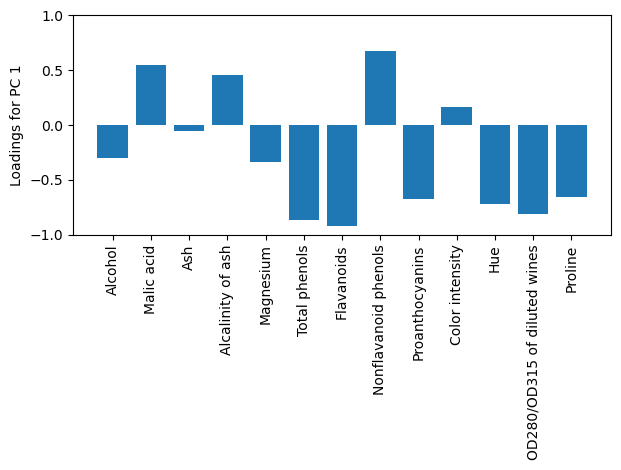

In [ ]:
fig, ax = plt.subplots()

ax.bar(range(13), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
#plt.savefig('figures/05_05_03.png', dpi=300)
plt.show()

## **Supervised data compression via linear discriminant analysis**

LDA can be used as a technique for feature extraction to increase computational efficiency and reduce
the degree of overfitting due to the curse of dimensionality in non-regularized models. The general
concept behind LDA is very similar to PCA, but whereas PCA attempts to find the orthogonal component
axes of maximum variance in a dataset, the goal in LDA is to find the feature subspace that optimizes
class separability. In the following sections, we will discuss the similarities between LDA and PCA in
more detail and walk through the LDA approach step by step.

## **Principal component analysis versus linear discriminant analysis**


|Principal Component Analysis (PCA)|Linear Discriminant analysis|
|---------------------------------------|---------------------------------------|
|linear transformation techniques |linear transformation techniques |
|unsupervised algorithm|supervised algorithm|
|LDA is a superior feature extraction technique for classification tasks | PCA tends to result in better classification results in an image recognition task|

![image.png](attachment:image.png)

**Assumption:**
- One assumption in LDA is that the data is normally distributed.
- Also, we assumethat the classes have identical covariance matrices
- The training examples are statistically independent of each other.
- owever, even if one, or more, of those assumptions is (slightly) violated, LDA for dimensionality reduction can still work reasonably well

**The inner workings of linear discriminant
analysis**

main steps
that are required to perform LDA:
 1. Standardize the d-dimensional dataset (d is the number of features).
 2. For each class, compute the d-dimensional mean vector.
 3. Construct the between-class scatter matrix, 𝑺𝑺 𝐵𝐵, and the within-class    scatter matrix, S<sub>𝑤</sub>.

**Note:** For more on the inner workings of the algorithm please check chapter 5 of the book [Machine Learning with PyTorch and Scikit-Learn: Develop machine learning and deep learning models with Python](https://www.amazon.it/Machine-Learning-PyTorch-Scikit-Learn-learning/dp/1801819319/ref=asc_df_1801819319/?tag=googshopit-21&linkCode=df0&hvadid=555317663662&hvpos=&hvnetw=g&hvrand=15435690996894715636&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1008325&hvtargid=pla-1763569602912&psc=1)

## **LDA via scikit-learn**



In [ ]:
# the following import statement is one line
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

Next, let's see how the logistic regression classifier handles the lower-dimensional
training dataset after the LDA transformation:

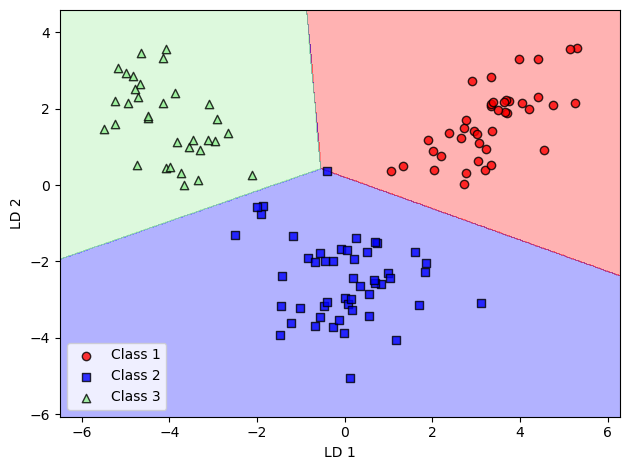

In [ ]:
lr = LogisticRegression(multi_class='ovr', random_state=1,solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

Let's take a look at the results on the test dataset:

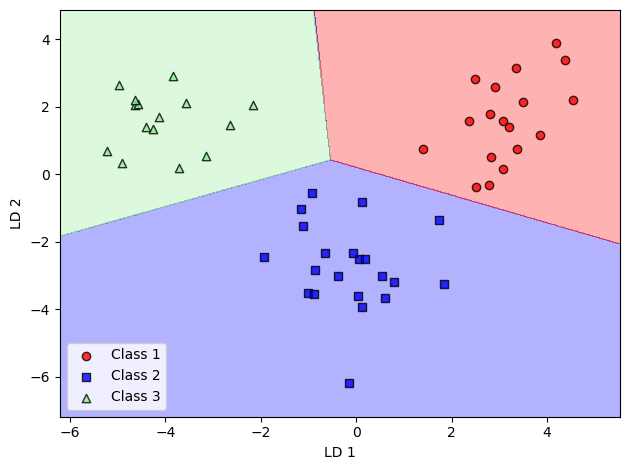

In [ ]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## **Using kernel principal component analysis for nonlinear mappings**

Many machine learning algorithms make assumptions about the linear separability of the input data. You have learned that the perceptron even requires perfectly linearly separable training data to converge. Other algorithms that we have covered so far assume that the lack of perfect linear separability is due to noise: Adaline, logistic regression, and the (standard) SVM to just name a few.

However, if we are dealing with nonlinear problems, which we may encounter
rather frequently in real-world applications, linear transformation techniques for dimensionality reduction, such as PCA and LDA, may not be the best choice.
In this section, we will take a look at a kernelized version of PCA, or KPCA, which relates to the concepts of kernel SVM that you will remember from Chapter 3, A Tour
of Machine Learning Classifiers Using scikit-learn. Using KPCA, we will learn how to transform data that is not linearly separable onto a new, lower-dimensional subspace that is suitable for linear classifiers.

![immagine.png](attachment:immagine.png)

### **Kernel functions and the kernel trick**

As you will remember from our discussion about kernel SVMs in Chapter 3, A Tour
of Machine Learning Classifiers Using scikit-learn, we can tackle nonlinear problems by
projecting them onto a new feature space of higher dimensionality where the classes become linearly separable. To transform the examples <i>x</i> ∈ ℝ     <sup>𝑑</sup> onto this higher
k-dimensional subspace, we defined a nonlinear mapping function, 𝜙:

![immagine-2.png](attachment:immagine-2.png)

We can think of 𝜙 as a function that creates nonlinear combinations of the original features to map the original d-dimensional dataset onto a larger, k-dimensional feature space.

**Note:** For more on the inner workings of the algorithm please check chapter 5 of the book [Machine Learning with PyTorch and Scikit-Learn: Develop machine learning and deep learning models with Python](https://www.amazon.it/Machine-Learning-PyTorch-Scikit-Learn-learning/dp/1801819319/ref=asc_df_1801819319/?tag=googshopit-21&linkCode=df0&hvadid=555317663662&hvpos=&hvnetw=g&hvrand=15435690996894715636&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1008325&hvtargid=pla-1763569602912&psc=1)

## **Implementing a kernel principal component analysis in Python**

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np


def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.
    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_examples, n_features]
    gamma: float
    Tuning parameter of the RBF kernel
    n_components: int
    Number of principal components to return
    Returns
    ------------
    X_pc: {NumPy ndarray}, shape = [n_examples, k_features]
    Projected dataset
    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')
    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)
    # Compute the symmetric kernel matrix.
    K = np.exp(-gamma * mat_sq_dists)
    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    # Obtaining eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    # Collect the top k eigenvectors (projected examples)
    X_pc = np.column_stack([eigvecs[:, i]
                            for i in range(n_components)])
    return X_pc

**Example 1 – separating half-moon shapes**
Now, let us apply our rbf_kernel_pca on some nonlinear example datasets. We
will start by creating a two-dimensional dataset of 100 example points representing
two half-moon shapes:

For the purposes of illustration,the half-moon of triangle symbols will represent one
class, and the half-moon depicted by the circle symbols will represent the examples
from another class:


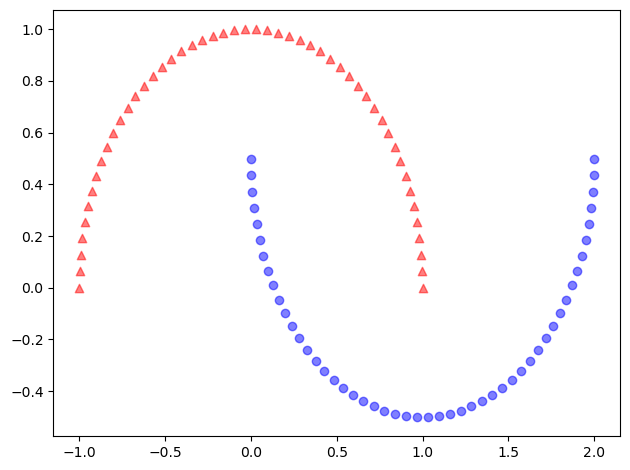

In [ ]:
print("For the purposes of illustration,\
the half-moon of triangle symbols will represent one\n\
class, and the half-moon depicted by the circle symbols will represent the examples\n\
from another class:")

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

Clearly, these two half-moon shapes are not linearly separable, and our goal is to
unfold the half-moons via KPCA so that the dataset can serve as a suitable input for
a linear classifier. But first, let's see how the dataset looks if we project it onto the
principal components via standard PCA:

Clearly, we can see in the resulting figure that a linear classifier would be unable to 
 perform well on the dataset transformed via standard PCA:


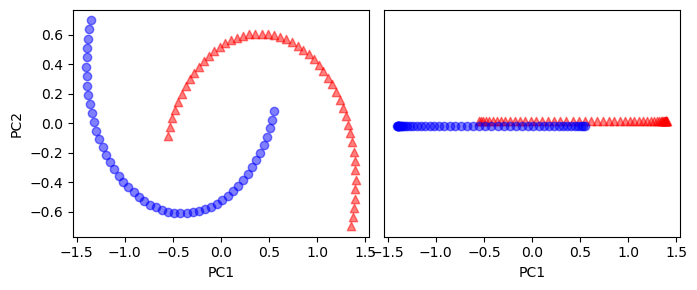

In [ ]:
print("Clearly, we can see in the resulting figure that a linear classifier would be unable to \n \
perform well on the dataset transformed via standard PCA:")


from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

**PCA versus LDA**


Please remember that PCA is an unsupervised method and does
not use class label information in order to maximize the variance
in contrast to LDA. Here, the triangle and circle symbols were
just added for visualization purposes to indicate the degree of
separation.

Now, let's try out our kernel PCA function, rbf_kernel_pca, which we
implemented in the previous subsection:

We can now see that the two classes (circles and triangles) are linearly well separated
so that we have a suitable training dataset for linear classifiers:


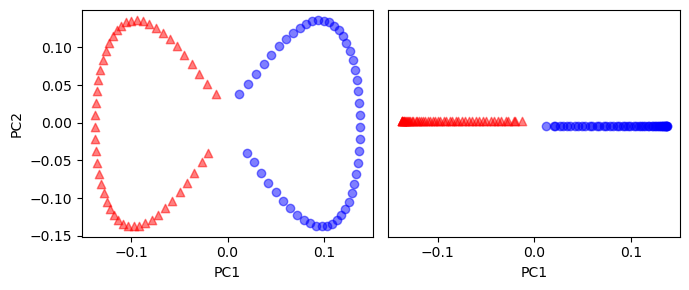

In [ ]:
print("We can now see that the two classes (circles and triangles) are linearly well separated\n\
so that we have a suitable training dataset for linear classifiers:")

X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02,color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

## **Example 2 – separating concentric circles**
In the previous subsection, we saw how to separate half-moon shapes via KPCA.
Since we put so much effort into understanding the concepts of KPCA, let's take a
look at another interesting example of a nonlinear problem, concentric circles:

Again, we assume a two-class problem where the triangle shapes represent one class,
and the circle shapes represent another class:


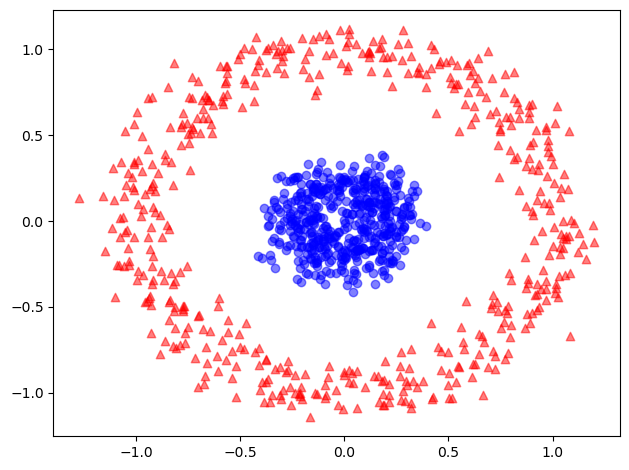

In [ ]:
print("Again, we assume a two-class problem where the triangle shapes represent one class,\n\
and the circle shapes represent another class:")

from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000,random_state=123, noise=0.1,factor=0.2)
plt.scatter(X[y == 0, 0], X[y == 0, 1],color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1],color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

Let's start with the standard PCA approach to compare it to the results of the RBF
kernel PCA:

Again, we can see that standard PCA is not able to produce results suitable for
training a linear classifier:


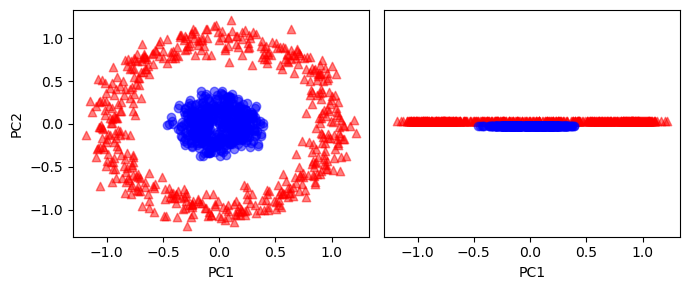

In [ ]:
print("Again, we can see that standard PCA is not able to produce results suitable for\n\
training a linear classifier:")

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((500,1))+0.02,color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500,1))-0.02,color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

Given an appropriate value for 𝛾, let's see if we are luckier using the RBF KPCA
implementation:

Again, the RBF KPCA projected the data onto a new subspace where the two classes
become linearly separable:


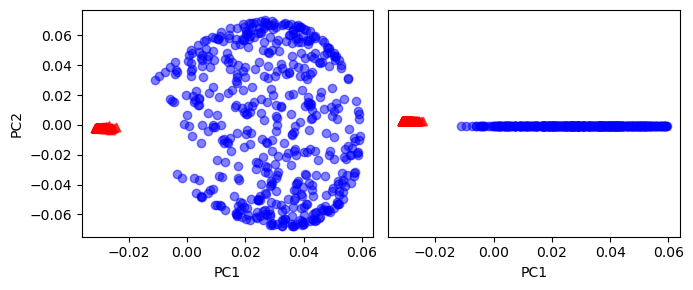

In [ ]:
print("Again, the RBF KPCA projected the data onto a new subspace where the two classes\n\
become linearly separable:")

X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500,1))+0.02,color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500,1))-0.02,color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

### **Kernel principal component analysis in scikit-learn**


Scikit-learn implements a KPCA class in the sklearn.
decomposition submodule. The usage is similar to the standard PCA class, and we
can specify the kernel via the kernel parameter:

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2,kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

To check that we get results that are consistent with our own KPCA implementation,
let's plot the transformed half-moon shape data onto the first two principal
components:

As we can see, the results of scikit-learn's KernelPCA are consistent with our own
implementation:


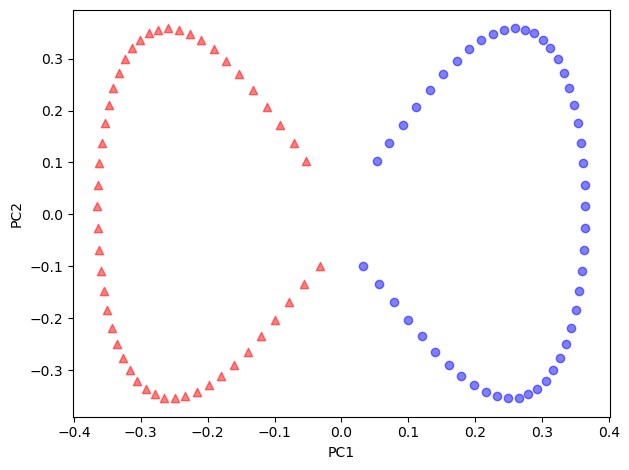

In [ ]:
print("As we can see, the results of scikit-learn's KernelPCA are consistent with our own\n\
implementation:")

plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1],color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1],color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

### **t-distributed stochastic neighbor embedding (t-SNE)**

since it is frequently used in literature to visualize
high-dimensional datasets in two or three dimensions. We will see how we can apply t-SNE to plot
images of handwritten images in a 2-dimensional feature space.

A classic example of manifold learning is the 3-dimensional Swiss roll illustrated in Figure 5.14:


![image.png](attachment:image.png)

**Note:** While nonlinear dimensionality reduction and manifold learning algorithms are very powerful, we
should note that these techniques are notoriously hard to use, and with non-ideal hyperparameter
choices, they may cause more harm than good. The reason behind this difficulty is that we are often
working with high-dimensional datasets that we cannot readily visualize and where the structure is not
obvious (unlike the Swiss roll example in Figure 5.14). Moreover, unless we project the dataset into two
or three dimensions (which is often not sufficient for capturing more complicated relationships), it is
hard or even impossible to assess the quality of the results. Hence, many people still rely on simpler
techniques such as PCA and LDA for dimensionality reduction.

**Visualizing data via t-distributed stochastic neighbor embedding**

The following code shows a quick demonstration of how t-SNE can be applied to a 64-dimensional
dataset. First, we load the Digits dataset from scikit-learn, which consists of low-resolution handwritten digits (the numbers 0-9):

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

The digits are 8×8 grayscale images. The following code plots the first four images in the dataset, which
consists of 1,797 images in total:

As we can see in Figure 5.15, the images are relatively low resolution, 8×8 pixels (that is, 64 pixels per
image):


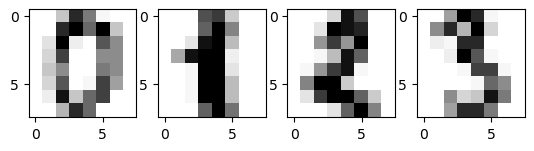

In [ ]:
print("As we can see in Figure 5.15, the images are relatively low resolution, 8×8 pixels (that is, 64 pixels per\n\
image):")

fig, ax = plt.subplots(1, 4)
for i in range(4):
     ax[i].imshow(digits.images[i], cmap='Greys')
plt.show()

Note that the digits.data attribute lets us access a tabular version of this dataset where the examples
are represented by the rows, and the columns correspond to the pixels:

In [ ]:
digits.data.shape

(1797, 64)

Next, let us assign the features (pixels) to a new variable X_digits and the labels to another new
variable y_digits:

In [ ]:
y_digits = digits.target
X_digits = digits.data

Then, we import the t-SNE class from scikit-learn and fit a new tsne object. Using fit_transform, we
perform the t-SNE fitting and data transformation in one step:

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca',random_state=123)
X_digits_tsne = tsne.fit_transform(X_digits)

Finally, let us visualize the 2D t-SNE embeddings using the following code:

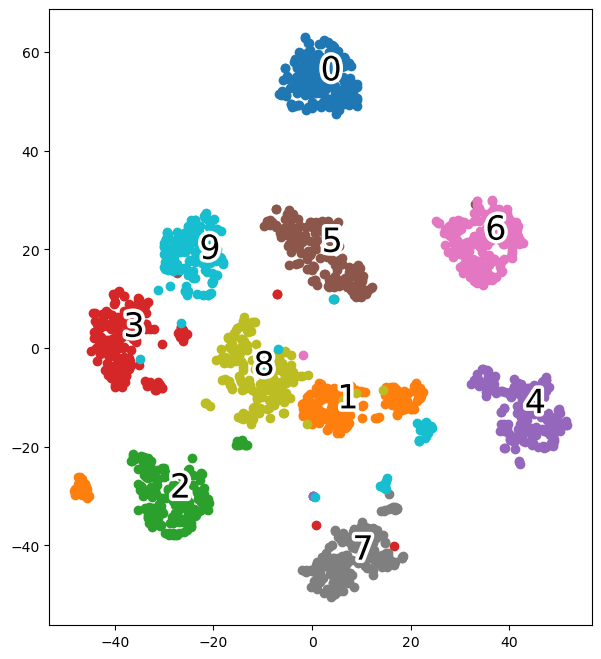

In [ ]:
import matplotlib.patheffects as PathEffects
def plot_projection(x, colors):
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    for i in range(10):
        plt.scatter(x[colors == i, 0],
        x[colors == i, 1])
    for i in range(10):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
plot_projection(X_digits_tsne, y_digits)
plt.show()

## **Summary**

In this chapter, you learned about two fundamental dimensionality reduction techniques for feature
extraction: PCA and LDA. Using **PCA**, we projected data onto a lower-dimensional subspace to maximize the variance along the orthogonal feature axes, while ignoring the class labels. **LDA**, in contrast
to PCA, is a technique for supervised dimensionality reduction, which means that it considers class
information in the training dataset to attempt to maximize the class separability in a linear feature
space. Lastly, you also learned about **t-SNE**, which is a nonlinear feature extraction technique that
can be used for visualizing data in two or three dimensions.
Equipped with PCA and LDA as fundamental data preprocessing techniques, you are now well prepared
to learn about the best practices for efficiently incorporating different preprocessing techniques and
evaluating the performance of different models in the next chapter.
